In [ ]:
import os
import cv2
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil
from sklearn.metrics import classification_report

import torch
from torchvision import transforms
from torchvision import models
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch import nn

from PIL import Image

torch.manual_seed(42)

import torch.optim as optim

print('done import')

done import


Data processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/CS4243

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1qciE7JQz5bfu-HRjLK9tRSSB2_HTWixG/CS4243


In [ ]:
path = '/content/drive/MyDrive/CS4243/Mathan/Data'

count = 0
for filename in os.listdir(path+"/threat"):
  count = count+1

for filename in os.listdir(path+'/normal'):
  count = count+1

for filename in os.listdir(path+'/carrying'):
  count = count+1

arr = []
print(str(count) +" Files found.")

4892 Files found.


In [ ]:
# !pip install split-folders
import splitfolders

%cd /content/drive/My Drive/CS4243/Mathan

# splitfolders.ratio("Data", output = "splitData", seed = 1337, ratio = (0.64,0.16,0.2))

# splitfolders.ratio("Data", # The location of dataset
#                    output="splitData", # The output location
#                    seed=42, # The number of seed
#                    ratio=(.7, .1, .2), # The ratio of splited dataset
#                    group_prefix=None, # If your dataset contains more than one file like ".jpg", ".pdf", etc
#                    move=False # If you choose to move, turn this into True
#                    )

/content/drive/.shortcut-targets-by-id/1qciE7JQz5bfu-HRjLK9tRSSB2_HTWixG/CS4243/Mathan


Copying files: 4892 files [03:15, 25.03 files/s]


In [ ]:
#Clear Test and Train
path = "/content/drive/MyDrive/CS4243/Mathan/sobelSplit"
# shutil.rmtree(path+"/test")
# shutil.rmtree(path+"/train")
# shutil.rmtree(path+"/val")

In [ ]:
# for filename in os.listdir(path):
#   print(filename)



In [ ]:
# needs grayscale image as input
def sobelEdgeDetection(image):
    gBlurredImage = cv2.GaussianBlur(image, (3,3),0)

    # sobel x axis
    edgeX = cv2.Sobel(src=gBlurredImage, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
    # sobel y axis
    edgeY = cv2.Sobel(src=gBlurredImage, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
    edgeXnY = np.sqrt(edgeX**2 + edgeY**2)
    edgeXnY_norm = (edgeXnY * 255 / edgeXnY.max()).astype(np.uint8)

    rgb_result = cv2.cvtColor(edgeXnY_norm, cv2.COLOR_GRAY2RGB)
    return rgb_result


/content/drive/.shortcut-targets-by-id/1qciE7JQz5bfu-HRjLK9tRSSB2_HTWixG/CS4243/Mathan/sobelSplit
test
train
val
/content/drive/.shortcut-targets-by-id/1qciE7JQz5bfu-HRjLK9tRSSB2_HTWixG/CS4243/Mathan/splitData
a0206131Y_20220831_normal_36200.077012_30.png
a0206131Y_20220831_normal_36200.077012_30.png
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


True

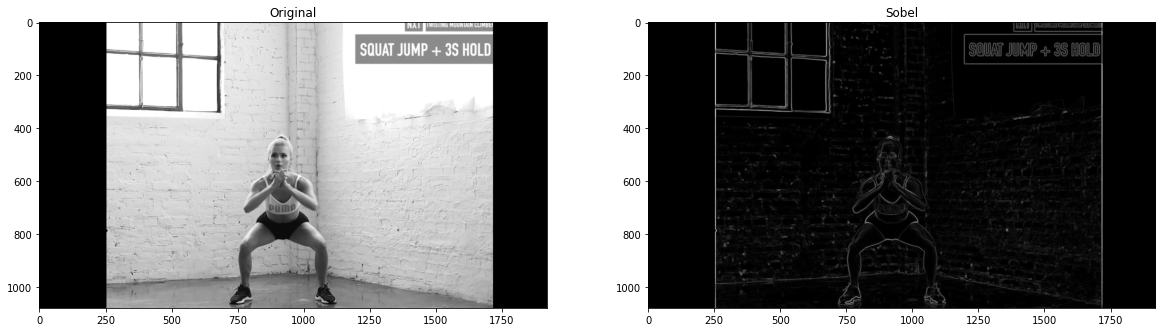

In [ ]:
# Creates the folders to house sobelSplit data

%cd /content/drive/My Drive/CS4243/Mathan/sobelSplit
path = "/content/drive/My Drive/CS4243/Mathan/sobelSplit/"

os.mkdir(path+ "test")
os.mkdir(path+ "train")
os.mkdir(path+ "val")

for filename in os.listdir(path):
  print(filename)

lis = ["test", "train", "val"]

for i in lis:
  os.mkdir(path + i + "/threat")
  os.mkdir(path + i + "/normal")
  os.mkdir(path + i + "/carrying")




%cd /content/drive/My Drive/CS4243/Mathan/splitData
path = "/content/drive/My Drive/CS4243/Mathan/splitData"
print(os.listdir(path+"/train/normal")[0])
image = os.listdir(path+"/train/normal")[0]
print(image)
os.chdir(path+"/train/normal")
img = cv2.imread(image, 0)
# print(img)
sobel = sobelEdgeDetection(img)
print(sobel)

i, (o,x1) = plt.subplots(1, 2, figsize = (20,10))

o.set_title('Original')
o.imshow(img, cmap = "gray")
x1.set_title('Sobel')
x1.imshow(sobel, cmap = "gray")

new_path = "/content/drive/My Drive/CS4243/Mathan/sobelSplit"
cv2.imwrite(new_path + "/train/normal/" + image, sobel)
# img = Image.open(root + str(img_path)) #similar to cv2.imread()
# img


In [ ]:
print(sobel.shape)

(1080, 1920, 3)


Used to generate sobel edge detection data


In [ ]:
# generating sobelSplit data from splitData images

%cd /content/drive/My Drive/CS4243/Mathan/splitData
path = "/content/drive/My Drive/CS4243/Mathan/splitData"
new_path = "/content/drive/My Drive/CS4243/Mathan/sobelSplit"

train_arr = []
count = 0
for filename in os.listdir(path+"/train/normal"):
  os.chdir(path+"/train/normal")
  img = cv2.imread(filename, 0)
  sobel = sobelEdgeDetection(img)
  cv2.imwrite(new_path + "/train/normal/" + filename, sobel)

  temp = [filename, 0, "train"]
  train_arr.append(temp)
  count+=1

%cd /content/drive/My Drive/CS4243/Mathan/splitData
for filename in os.listdir(path+"/train/carrying"):
  os.chdir(path+"/train/carrying")
  img = cv2.imread(filename, 0)
  sobel = sobelEdgeDetection(img)
  cv2.imwrite(new_path + "/train/carrying/" + filename, sobel)

  temp = [filename, 1, "train"]
  train_arr.append(temp)
  count+=1

%cd /content/drive/My Drive/CS4243/Mathan/splitData
for filename in os.listdir(path+"/train/threat"):
  os.chdir(path+"/train/threat")
  img = cv2.imread(filename, 0)
  sobel = sobelEdgeDetection(img)
  cv2.imwrite(new_path + "/train/threat/" + filename, sobel)


  temp = [filename, 2, "train"]
  train_arr.append(temp)
  count+=1

test_arr = []
%cd /content/drive/My Drive/CS4243/Mathan/splitData
for filename in os.listdir(path+"/test/normal"):
  os.chdir(path+"/test/normal")
  img = cv2.imread(filename, 0)
  sobel = sobelEdgeDetection(img)
  cv2.imwrite(new_path + "/test/normal/" + filename, sobel)


  temp = [filename, 0, "test"]
  test_arr.append(temp)
  count+=1

%cd /content/drive/My Drive/CS4243/Mathan/splitData
for filename in os.listdir(path+"/test/carrying"):
  os.chdir(path+"/test/carrying")
  img = cv2.imread(filename, 0)
  sobel = sobelEdgeDetection(img)
  cv2.imwrite(new_path + "/test/carrying/" + filename, sobel)


  temp = [filename, 1, "test"]
  test_arr.append(temp)
  count+=1

%cd /content/drive/My Drive/CS4243/Mathan/splitData
for filename in os.listdir(path+"/test/threat"):
  os.chdir(path+"/test/threat")
  img = cv2.imread(filename, 0)
  sobel = sobelEdgeDetection(img)
  cv2.imwrite(new_path + "/test/threat/" + filename, sobel)


  temp = [filename, 2, "test"]
  test_arr.append(temp)
  count+=1

val_arr = []
%cd /content/drive/My Drive/CS4243/Mathan/splitData
for filename in os.listdir(path+"/val/normal"):
  os.chdir(path+"/val/normal")
  img = cv2.imread(filename, 0)
  sobel = sobelEdgeDetection(img)
  cv2.imwrite(new_path + "/val/normal/" + filename, sobel)


  temp = [filename, 0, "val"]
  val_arr.append(temp)
  count+=1

%cd /content/drive/My Drive/CS4243/Mathan/splitData
for filename in os.listdir(path+"/val/carrying"):
  os.chdir(path+"/val/carrying")
  img = cv2.imread(filename, 0)
  sobel = sobelEdgeDetection(img)
  cv2.imwrite(new_path + "/val/carrying/" + filename, sobel)

  temp = [filename, 1, "val"]
  val_arr.append(temp)
  count+=1

%cd /content/drive/My Drive/CS4243/Mathan/splitData
for filename in os.listdir(path+"/val/threat"):
  os.chdir(path+"/val/threat")
  img = cv2.imread(filename, 0)
  sobel = sobelEdgeDetection(img)
  cv2.imwrite(new_path + "/val/threat/" + filename, sobel)
  temp = [filename, 2, "val"]
  val_arr.append(temp)
  count+=1

print(len(train_arr)+ len(test_arr)+ len(val_arr))
print(count)

/content/drive/.shortcut-targets-by-id/1qciE7JQz5bfu-HRjLK9tRSSB2_HTWixG/CS4243/Mathan/splitData
/content/drive/.shortcut-targets-by-id/1qciE7JQz5bfu-HRjLK9tRSSB2_HTWixG/CS4243/Mathan/splitData
/content/drive/.shortcut-targets-by-id/1qciE7JQz5bfu-HRjLK9tRSSB2_HTWixG/CS4243/Mathan/splitData
/content/drive/.shortcut-targets-by-id/1qciE7JQz5bfu-HRjLK9tRSSB2_HTWixG/CS4243/Mathan/splitData
/content/drive/.shortcut-targets-by-id/1qciE7JQz5bfu-HRjLK9tRSSB2_HTWixG/CS4243/Mathan/splitData
/content/drive/.shortcut-targets-by-id/1qciE7JQz5bfu-HRjLK9tRSSB2_HTWixG/CS4243/Mathan/splitData
/content/drive/.shortcut-targets-by-id/1qciE7JQz5bfu-HRjLK9tRSSB2_HTWixG/CS4243/Mathan/splitData
/content/drive/.shortcut-targets-by-id/1qciE7JQz5bfu-HRjLK9tRSSB2_HTWixG/CS4243/Mathan/splitData
/content/drive/.shortcut-targets-by-id/1qciE7JQz5bfu-HRjLK9tRSSB2_HTWixG/CS4243/Mathan/splitData
4892
4892


Used to create dataframe from existing dataset

In [ ]:
# path = "/content/drive/My Drive/CS4243/Mathan/splitData"
path = "/content/drive/My Drive/CS4243/Mathan/sobelSplit"


train_arr = []
count = 0
for filename in os.listdir(path+"/train/normal"):
  temp = [filename, 0, "train"]
  train_arr.append(temp)
  count+=1

for filename in os.listdir(path+"/train/carrying"):
  temp = [filename, 1, "train"]
  train_arr.append(temp)
  count+=1

for filename in os.listdir(path+"/train/threat"):
  temp = [filename, 2, "train"]
  train_arr.append(temp)
  count+=1

test_arr = []
for filename in os.listdir(path+"/test/normal"):
  temp = [filename, 0, "test"]
  test_arr.append(temp)
  count+=1

for filename in os.listdir(path+"/test/carrying"):
  temp = [filename, 1, "test"]
  test_arr.append(temp)
  count+=1

for filename in os.listdir(path+"/test/threat"):
  temp = [filename, 2, "test"]
  test_arr.append(temp)
  count+=1

val_arr = []
for filename in os.listdir(path+"/val/normal"):
  temp = [filename, 0, "val"]
  val_arr.append(temp)
  count+=1

for filename in os.listdir(path+"/val/carrying"):
  temp = [filename, 1, "val"]
  val_arr.append(temp)
  count+=1

for filename in os.listdir(path+"/val/threat"):
  temp = [filename, 2, "val"]
  val_arr.append(temp)
  count+=1

print(len(train_arr)+ len(test_arr)+ len(val_arr))
print(count)

4892
4892


In [ ]:
column_values = ['filename', 'label','dataset']

train_df = pd.DataFrame(data = train_arr,
                  columns = column_values)

test_df = pd.DataFrame(data = test_arr,
                  columns = column_values)

val_df = pd.DataFrame(data = val_arr,
                  columns = column_values)

# df = pd.DataFrame(data = arr,
#                   columns = column_values)

# pd.Categorical(df['dataset'],categories=['Train','Test'],ordered=True)
# df = df.sort_values('dataset',ascending=False)
# df = df.reset_index(drop=True)
# print(df)
# df.to_csv('labels.csv') # save images to csv files
# train_df = df[df['dataset'] == 'Train'] # separate this part into reading from csv
# test_df = df[df['dataset'] == 'Test']
print(train_df)
print(test_df)
print(val_df)

                                            filename  label dataset
0      a0206131Y_20220831_normal_36200.077012_30.png      0   train
1      a0206131Y_20220831_normal_31040.24376_100.png      0   train
2       A0216284E_20220904_normal_00010.21574_30.png      0   train
3      a0206131Y_20220831_normal_42380.010823_30.png      0   train
4     a0206131Y_20220831_normal_36200.077012_100.png      0   train
...                                              ...    ...     ...
3417    A0194513E_20220831_threat_41950.2417_100.png      2   train
3418   A0194513E_20220831_threat_66670.46604_100.png      2   train
3419   A0194554W_20220904_threat_12360.39796_200.png      2   train
3420   A0194554W_20220904_threat_12360.39796_100.png      2   train
3421    A0194554W_20220904_threat_12350.17374_30.png      2   train

[3422 rows x 3 columns]
                                           filename  label dataset
0      A0170549Y_20220909_normal_57340.73756_30.png      0    test
1      A0192318A_20220903

In [ ]:
class CS4243_dataset(Dataset):

    def __init__(self, root_path , dataframe, transform=None):

        self.df = dataframe
        self.transform = transform
        self.root_path = root_path

        self.folder = self.df['dataset']
        self.filename = self.df['filename'] #image names
        self.labels = self.df['label']


    def __getitem__(self, index):
        if self.labels[index] == 0:
          img_path = self.folder[index].lower() + '/normal/' + self.filename[index]
        if self.labels[index] == 1:
          img_path = self.folder[index].lower() + '/carrying/' + self.filename[index]
        if self.labels[index] == 2:
          img_path = self.folder[index].lower() + '/threat/' + self.filename[index]

        # img_path = self.folder[index].lower() + '/' + self.filename[index]
        image = Image.open(self.root_path + str(img_path))
        # rgbImage = Image.new("RGB", image.size)
        # rgbImage.paste(image)
        # rgbImage.save(self.root_path + str(img_path))
        # image = Image.open(self.root_path + str(img_path))

        target = torch.tensor(self.labels[index])

        if self.transform != None:
            image = self.transform(image)

        return [image, target]

    def __len__(self):
        return len(self.df)

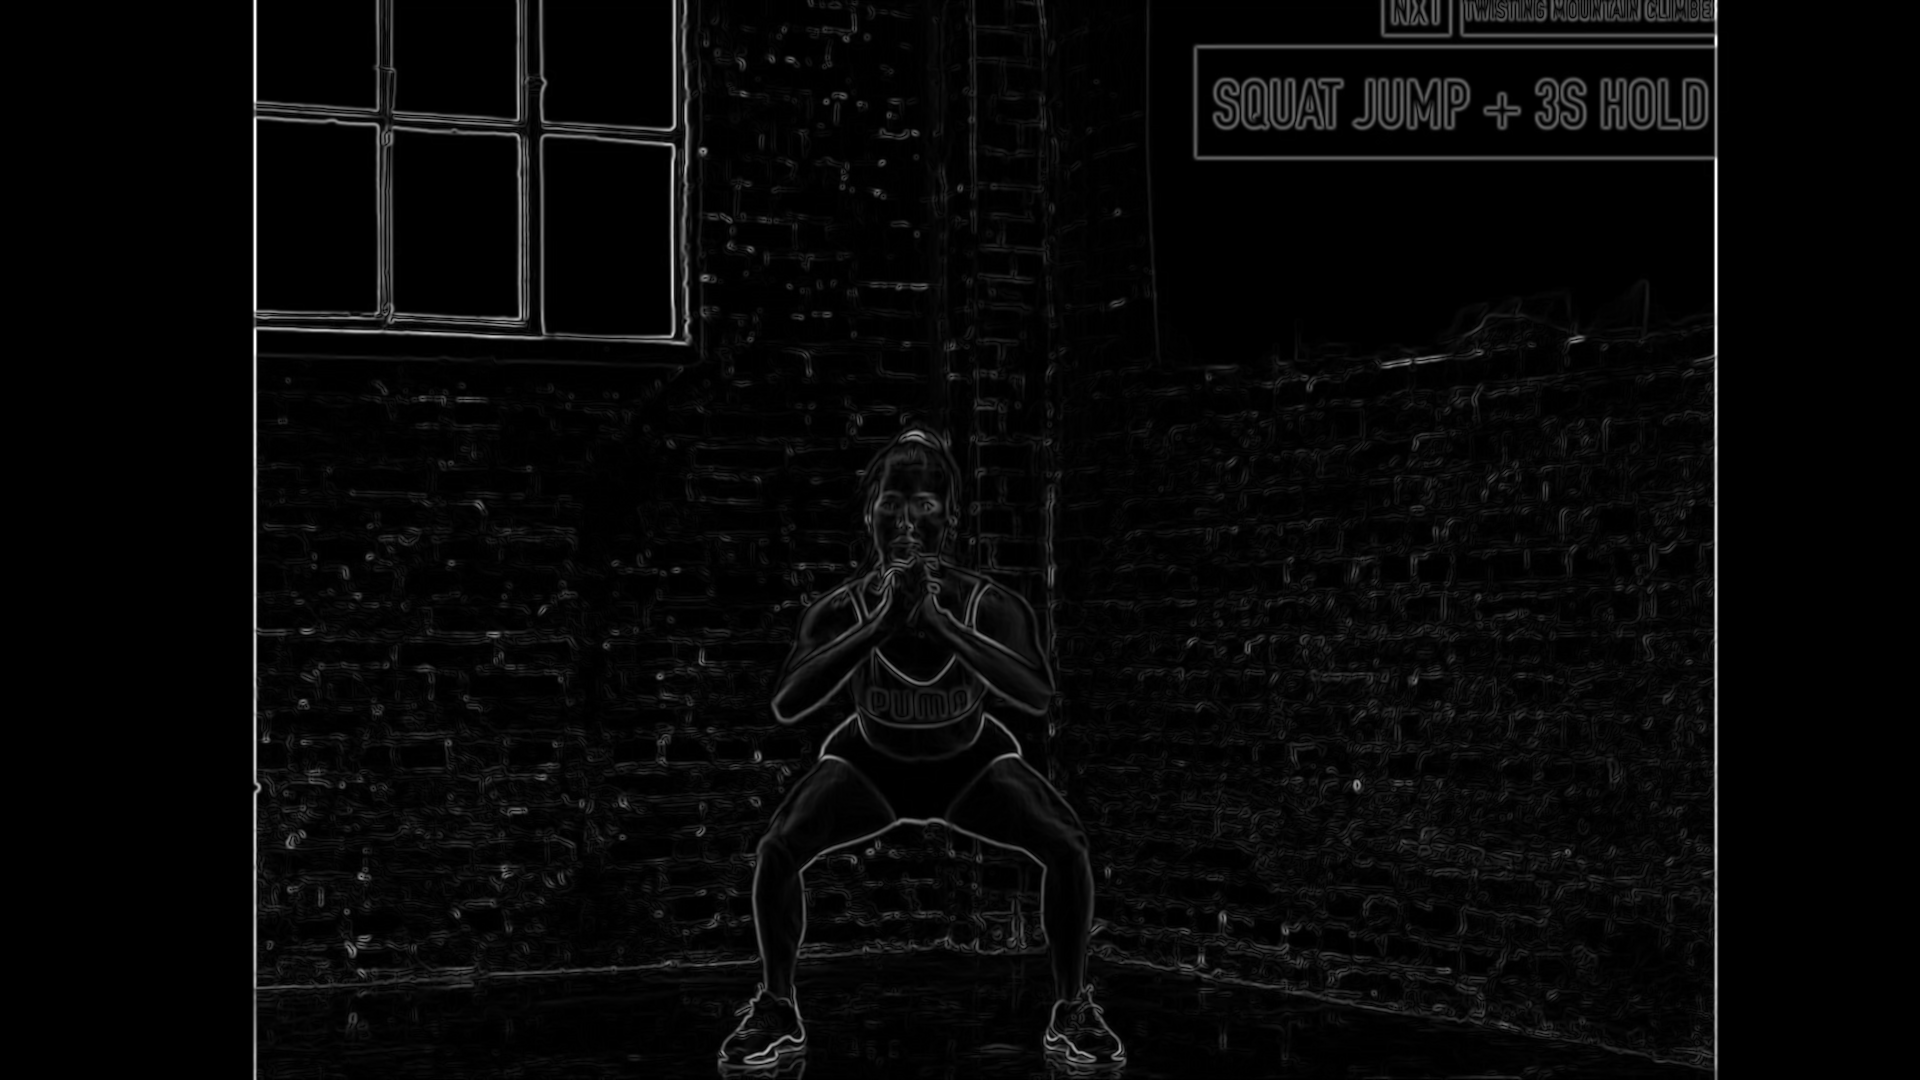

In [ ]:
# root = "/content/drive/My Drive/CS4243/Mathan/splitData/"
root = "/content/drive/My Drive/CS4243/Mathan/sobelSplit/"
# folder= train_df['dataset'].lower()
img_path = train_df['dataset'][0].lower() + '/normal/' + train_df['filename'][0]
img = Image.open(root + str(img_path)) #similar to cv2.imread()
img

In [ ]:
batch_size = 128
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# use this for grayscale images
# normalize = transforms.Normalize(mean=[0.485], std=[0.229])

transformations = transforms.Compose([
                transforms.Resize(size=(224,224),interpolation=2),
                transforms.ToTensor(), #3*H*W, [0, 1]
                normalize]) # normalize with mean/std

# root = "/content/drive/My Drive/CS4243/Mathan/splitData/"
root = "/content/drive/My Drive/CS4243/Mathan/sobelSplit/"
train_dataset = CS4243_dataset(root, train_df, transform = transformations)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, num_workers=2, shuffle = True, pin_memory=True)
train_dataset.__getitem__(0)

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:333: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  "Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. "


[tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044,

In [ ]:
val_dataset = CS4243_dataset(root, val_df, transform = transformations)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, num_workers=2, shuffle = True, pin_memory=True)
val_dataset.__getitem__(0)

[tensor([[[-1.4672, -1.5185, -1.5185,  ..., -2.0494, -2.0152, -2.0152],
          [-1.3644, -1.6213, -1.6042,  ..., -2.0323, -1.9980, -2.0323],
          [-0.9534, -1.4672, -1.2617,  ..., -2.0323, -1.9809, -2.0494],
          ...,
          [-1.6042, -1.3987, -0.9192,  ..., -1.7412, -1.7583, -1.7754],
          [-1.7925, -1.2445, -1.0904,  ..., -1.6042, -1.6898, -1.7069],
          [-1.8097, -1.0562, -1.1418,  ..., -1.7412, -1.7583, -1.8610]],
 
         [[-1.3704, -1.4230, -1.4230,  ..., -1.9657, -1.9307, -1.9307],
          [-1.2654, -1.5280, -1.5105,  ..., -1.9482, -1.9132, -1.9482],
          [-0.8452, -1.3704, -1.1604,  ..., -1.9482, -1.8957, -1.9657],
          ...,
          [-1.5105, -1.3004, -0.8102,  ..., -1.6506, -1.6681, -1.6856],
          [-1.7031, -1.1429, -0.9853,  ..., -1.5105, -1.5980, -1.6155],
          [-1.7206, -0.9503, -1.0378,  ..., -1.6506, -1.6681, -1.7731]],
 
         [[-1.1421, -1.1944, -1.1944,  ..., -1.7347, -1.6999, -1.6999],
          [-1.0376, -1.2990,

In [ ]:
class Network(nn.Module):
    def __init__(self, pretrained = True, num_classes = 3, drop_rate = 0):
        super(Network, self).__init__()
        resnet = models.resnet18(pretrained) #https://pytorch.org/vision/0.8/models.html

        self.features = nn.Sequential(*list(resnet.children())[:-1]) # after avgpool 512x1

        fc_in_dim = list(resnet.children())[-1].in_features # original fc layer's in dimention 512
        self.fc = nn.Linear(fc_in_dim, num_classes) # new fc layer 512x8

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)

        x = self.fc(x)

        return F.softmax(x, dim=1) #classification output

In [ ]:
model = Network() #instantiate
model.to("cuda")

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
print(model)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Network(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True

In [ ]:
num_epochs = 16
criterion = nn.CrossEntropyLoss()


num_correct = 0
num_samples = 0
print(train_loader)
model.train() #set model in training mode # if testing model, use model.eval()

min_valid_loss = np.inf
path_save = "/content/drive/My Drive/CS4243/Mathan/"

for epoch in range(num_epochs):
    train_loss = 0.0
    for (x, y) in train_loader:

        x = x.to("cuda") #images
        y = y.to("cuda") #unpacks labels

        preds = model(x) #forward pass

        loss = criterion(preds, y)
        print(loss)
        optimizer.zero_grad() # backward
        loss.backward()
        optimizer.step() # gradient descent or adam step

        num_correct += torch.sum(torch.eq(preds.argmax(1), y)).item()
        num_samples += preds.size(0)

        train_loss += loss.item()

    '''
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in val_loader:

        data = data.to("cuda")
        labels = labels.to("cuda")
        # # Transfer Data to GPU if available
        # if torch.cuda.is_available():
        #     data, labels = data.cuda(), labels.cuda()

        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    '''

    train_accuracy = num_correct/num_samples
    print("Epoch:",epoch, "train_accuracy:", train_accuracy)

    '''
    print("validation loss: ", valid_loss/len(val_loader))

    if min_valid_loss > valid_loss:
      print(f"Validation Loss Decreased({min_valid_loss:.3f}--->{valid_loss:.3f}) \t Saving The Model")
      min_valid_loss = valid_loss

      # Saving State Dict
      torch.save(model.state_dict(), path_save + 'sobel_with_val.pth')
    '''


tensor(1.1056, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0949, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0343, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0761, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0269, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0996, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0590, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1064, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0125, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9984, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1193, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0277, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0307, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0502, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0420, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0719, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0812, device='cuda:0', grad_fn=

KeyboardInterrupt: ignored

In [ ]:
# test loop and classification/ confusion metrix
def test(model, dataset, device='cpu'):
    model.eval()
    data_loader = DataLoader(dataset, batch_size=128, shuffle=False, num_workers=2, pin_memory=True)
    labels = []
    count = 0
    with torch.no_grad():
        for data in data_loader:
            images = data[0].to(device)
            #target = data[1].to(device)

            outputs = model(images).cpu()
            # TODO: get the label predictions
            preds = torch.argmax(outputs, dim=1).tolist()
            print(preds, count)
            count +=1
            labels += preds

    return labels

In [ ]:
# test_df = test_df.reset_index(drop=True)# make sure test_df index starts from 0
if torch.cuda.is_available():
    device_str = 'cuda' #'cuda:{}'.format(0)
else:
    device_str = 'cpu'
print(device_str)
print(root)
device = torch.device(device_str)

test_df = test_df.reset_index(drop=True)# make sure test_df index starts from 0
test_dataset = CS4243_dataset(root, test_df, transform=transformations)
test_preds = test(model, test_dataset, device)
test_actual = test_df['label']

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print(classification_report(test_actual, test_preds))
print(confusion_matrix(test_actual, test_preds))

cuda
/content/drive/My Drive/CS4243/Mathan/sobelSplit/
[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0] 0
[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0] 1
[0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

print(accuracy_score(test_preds, test_actual.tolist())*100)

70.77393075356414


In [ ]:
path_save = "/content/drive/My Drive/CS4243/Mathan/"
torch.save(model, path_save+"sobelOnly.pt")